In [76]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
import random
from qiskit.circuit.library import UnitaryGate

In [77]:
# Aquí se define la cantidad de qubits (n) que se van a usar:
n = 1

In [78]:
# Aquí se define la función a usar
# tipo = 0 significa función constante
# tipo = 1 significa función balanceada
# tipo = 2 significa función aleatoria (puede no ser ni constante ni balanceada)

tipo = 2

In [79]:
def balanced_random_binary(N):
    if N % 2 != 0:
        raise ValueError("N must be even to have equal number of 1s and 0s.")
    
    half = N // 2
    bits = [1] * half + [0] * half
    random.shuffle(bits)
    
    binary_string = ''.join(map(str, bits))
    return int(binary_string, 2)

rep = 0
bits = 1<<n

if tipo == 0:
    if random.randint(0, 1):
        rep = 1
else:
    rep = balanced_random_binary(bits) if tipo == 1 else random.randint(0, (1<<bits) - 1)

print(bin(rep)[2:].zfill(bits))

10


In [80]:
matrix = np.zeros((2**(n+1), 2**(n+1)))

for i in range(bits):
    f = 1 if rep & (1<<i) else 0
    matrix[2*i, 2*i] = 1 - f
    matrix[2*i + 1, 2*i] = f
    matrix[2*i, 2*i + 1] = f
    matrix[2*i + 1, 2*i + 1] = 1 - f

print(matrix)

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [81]:
backend = Aer.get_backend('unitary_simulator')

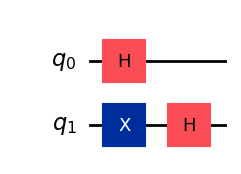

In [82]:
qr = QuantumRegister(n + 1, name="q")
cr = ClassicalRegister(n, name="c")

circuit1 = QuantumCircuit(qr)
circuit1.x(n)
circuit1.h(range(n + 1))
circuit1.draw("mpl")

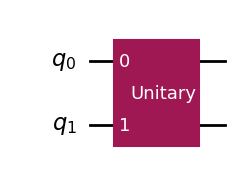

In [83]:
circuit2 = QuantumCircuit(qr)
circuit2.append(UnitaryGate(matrix), range(n + 1))
circuit2.draw("mpl")

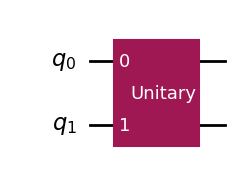

In [84]:
job2 = transpile(circuit2, backend)
job2.draw("mpl")

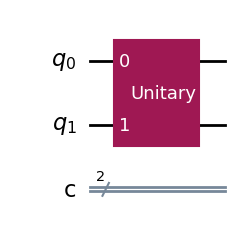

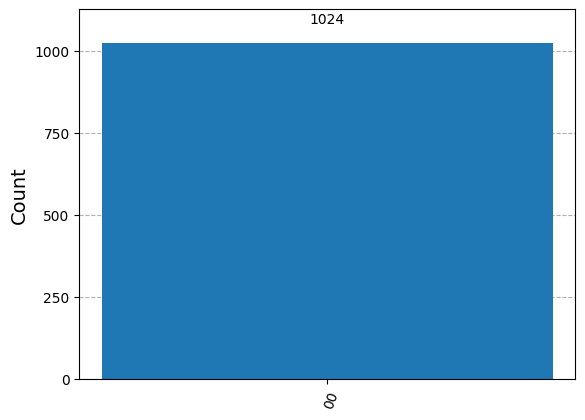

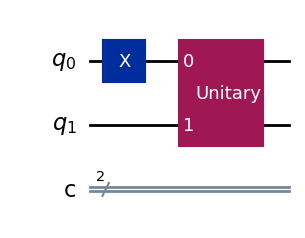

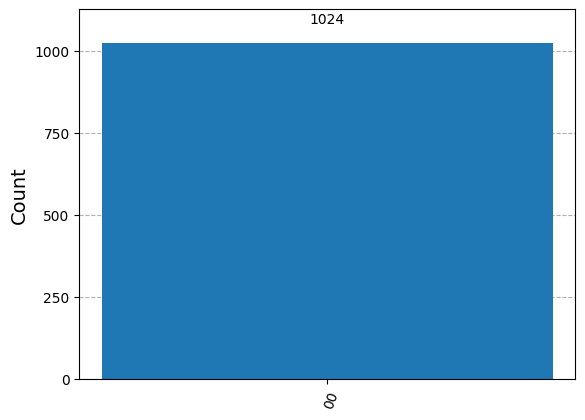

In [87]:
for i in range(2**n):
    testCircuit = QuantumCircuit(2, 2)
    for j in range(n):
        if i & 1<<j:
            testCircuit.x(j)
    testCircuit.append(UnitaryGate(matrix), range(n+1))
    #testCircuit.measure(range(2), range(2))
    display(testCircuit.draw("mpl"))
    counts = backend.run(transpile(testCircuit, backend), shots=1024).result().get_counts()
    display(plot_histogram(counts))


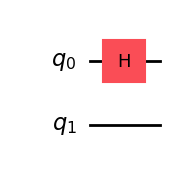

In [57]:
circuit3 = QuantumCircuit(qr)
circuit3.h(range(n))
circuit3.draw("mpl")

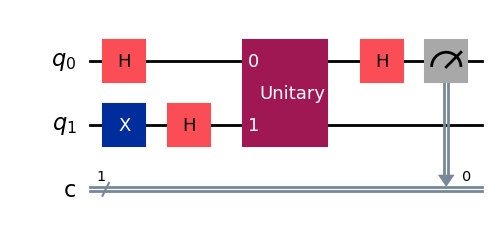

In [58]:
circuit = QuantumCircuit(qr, cr)
circuit.compose(circuit1, inplace=True)
circuit.compose(circuit2, inplace=True)
circuit.compose(circuit3, inplace=True)
circuit.measure(range(n), range(n))
circuit.draw("mpl")

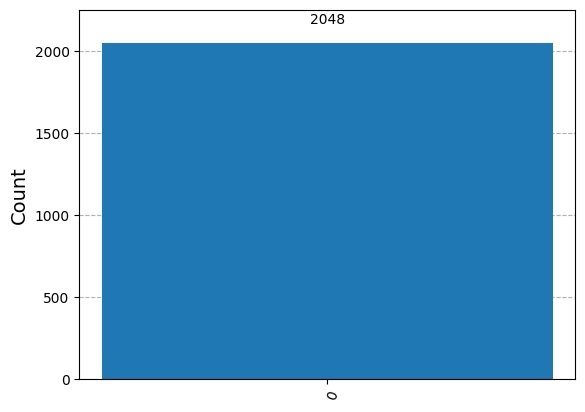

In [59]:
backend = Aer.get_backend('statevector_simulator')
compiled = transpile(circuit, backend)
counts = backend.run(compiled, shots=2048).result().get_counts()
display(plot_histogram(counts))

In [60]:
output = counts.get('0'*n, 0)
if output == 2048:
    print("Es una función constante")
elif output == 0:
    print("Es una función balanceada")
else:
    print("No es una función constante ni balanceada")

Es una función constante
